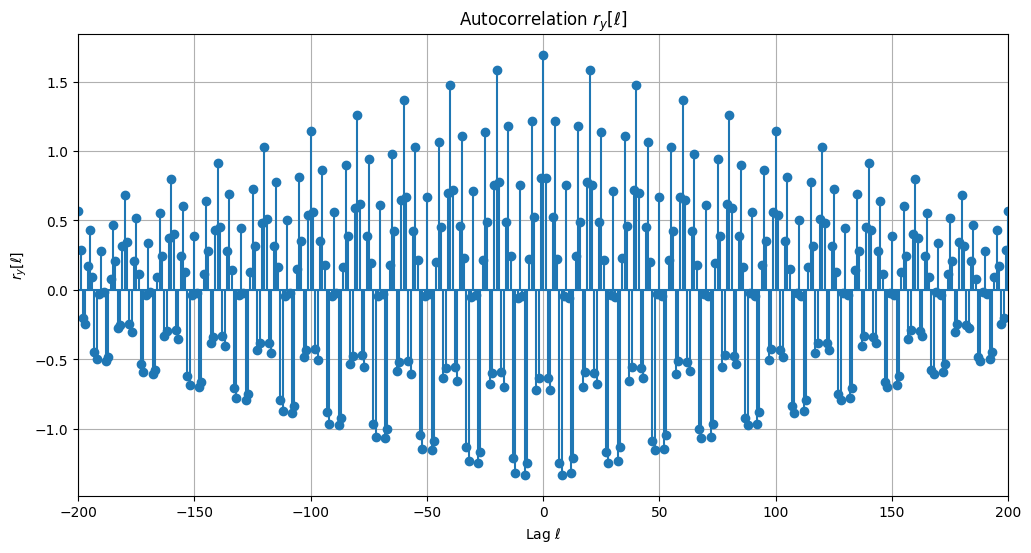

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = np.arange(0, 301)  # 0 to 300
D = 50
a1 = 0.1
a2 = 0.05

# Generate u[n]
u = np.cos(0.1 * np.pi * n) + 0.8 * np.cos(0.4 * np.pi * n) + 0.6 * np.cos(1.6 * np.pi * n)

# Generate delayed versions of u[n]
u_delayed_50 = np.zeros_like(u)
u_delayed_50[50:] = u[:-50]  # u[n-50], padded with 0s for n < 50

u_delayed_100 = np.zeros_like(u)
u_delayed_100[100:] = u[:-100]  # u[n-100], padded with 0s for n < 100

# Generate y[n]
y = u + a1 * u_delayed_50 + a2 * u_delayed_100

# Compute autocorrelation using numpy
autocorr = np.correlate(y, y, mode='full')
lags = np.arange(-len(y)+1, len(y))  # Lags from -300 to +300

# Extract lags from -200 to +200
valid_indices = (lags >= -200) & (lags <= 200)
autocorr_valid = autocorr[valid_indices]
lags_valid = lags[valid_indices]

# Normalize to match theoretical scaling (optional)
autocorr_valid = autocorr_valid / len(y)

# Plot
plt.figure(figsize=(12, 6))
plt.stem(lags_valid, autocorr_valid, basefmt='C0-', linefmt='C0-', markerfmt='C0o')  # Fixed stem plot
plt.title('Autocorrelation $r_y[\ell]$')
plt.xlabel('Lag $\ell$')
plt.ylabel('$r_y[\ell]$')
plt.grid(True)
plt.xlim(-200, 200)
plt.show()

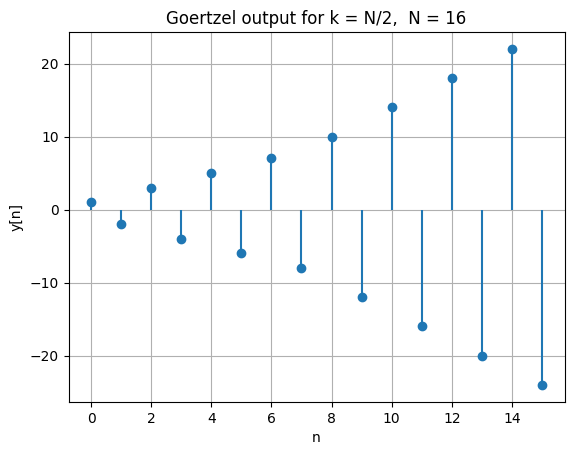

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example "block length":
N = 16

# Impulse response for k = N/2:
#   h[n] = (n+1)*(-1)^n for n>=0, and 0 otherwise
def h(n):
    if n < 0:
        return 0
    return (n+1)*((-1)**n)

y_vals = []
for n in range(N):
    # Output = h(n) + h(n - N/2),
    # but h(...) is zero for negative indices
    y_n = h(n) + h(n - N//2)
    y_vals.append(y_n)

# Plot the result
plt.stem(y_vals, basefmt=" ")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title(f"Goertzel output for k = N/2,  N = {N}")
plt.grid(True)
plt.show()
